# Forest Fires ML Regression Project

In this project we are using the deep learning approach to predict the burned area of the forest fires dataset from UCI Machine Learning Repository. For more informations about the dataset and the previous work see [Notebook-01-Linear-Regression](http://localhost:8888/notebooks/Notebook-01-Linear-Regression.ipynb) and [Notebook-02-Tree-Regression](http://localhost:8888/notebooks/Notebook-02-Tree-Regression.ipynb)

In [1]:
# importing tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import os
import IPython.display

In [2]:
# reading the processed version of the dataset from notebook 1
data = pd.read_csv('Data/forestfires_processed.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
display(data.head())

,X,Y,sin(month),sin(day),log(FFMC),DMC,log(DC),log(ISI),temp,log(RH),wind,log(rain),log(area)
0,7,5,0.141120,-0.958924,4.468204,26.2,4.557030,1.808289,8.2,3.951244,6.7,0.000000,0.0
1,7,4,-0.544021,0.909297,4.517431,35.4,6.507427,2.041220,18.0,3.526361,0.9,0.000000,0.0
2,7,4,-0.544021,-0.279415,4.517431,43.7,6.533643,2.041220,14.6,3.526361,1.3,0.000000,0.0
3,8,6,0.141120,-0.958924,4.529368,33.3,4.363099,2.302585,8.3,4.584967,4.0,0.182322,0.0
4,8,6,0.141120,0.656987,4.503137,51.3,4.636669,2.360854,11.4,4.605170,1.8,0.000000,0.0


In [3]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.000000,3.000000,4.000000,7.000000,9.000000
Y,517.0,4.299807,1.229900,2.000000,4.000000,4.000000,5.000000,9.000000
sin(month),517.0,0.529924,0.468640,-0.999990,0.412118,0.412118,0.989358,0.989358
sin(day),517.0,0.076119,0.715357,-0.958924,-0.756802,0.141120,0.841471,0.909297
log(FFMC),517.0,4.515021,0.088019,2.980619,4.513055,4.528289,4.542230,4.576771
DMC,517.0,110.872340,64.046482,1.100000,68.600000,108.300000,142.400000,291.300000
log(DC),517.0,6.041721,0.957204,2.186051,6.083816,6.500088,6.572143,6.758791
log(ISI),517.0,2.204023,0.474845,0.000000,2.014903,2.240710,2.468100,4.044804
temp,517.0,18.889168,5.806625,2.200000,15.500000,19.300000,22.800000,33.300000
log(RH),517.0,3.751048,0.352269,2.772589,3.526361,3.761200,3.988984,4.615121


In [4]:
# scaling the data
scaler = StandardScaler()


for col in data.columns:
    if col != 'log(area)':
        data[col] = scaler.fit_transform(data[[col]])

In [5]:
# utility functions

def split_data(data, fraction = 0.8):
    train_data = data.sample(frac = fraction, random_state = 42)
    test_data = data.drop(train_data.index)
    X_train, y_train = train_data.drop(columns = ['log(area)']), train_data['log(area)']
    X_test, y_test = test_data.drop(columns = ['log(area)']), test_data['log(area)']
    return (X_train, X_test, y_train, y_test)

def fit_evaluate(model, data):
    X_train, X_test, y_train, y_test = split_data(data)
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, verbose = 0)
    print(f'training R2 score: {r2_score(y_train, model.predict(X_train)): .5f}')
    print(f'testing R2 score: {r2_score(y_test, model.predict(X_test)): .5f}')
    return history

def plot_scores(history):
    plt.figure(figsize = (8, 4))
    plt.plot(history.history['loss'], label = 'Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Values')
    plt.legend()

In [6]:
# quick model

X_train, X_test, y_train, y_test = split_data(data, 0.8)

model = Sequential([Dense(64, input_dim = 12, activation = 'relu'), Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


training R2 score:  0.07516
testing R2 score: -0.08394


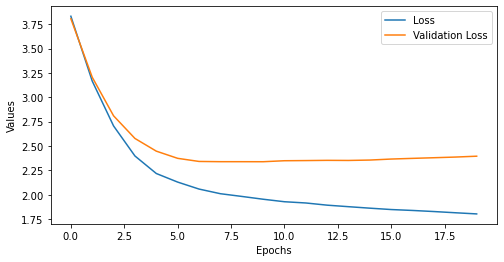

In [7]:
history = fit_evaluate(model, data)
plot_scores(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
training R2 score:  0.07817
testing R2 score: -0.029

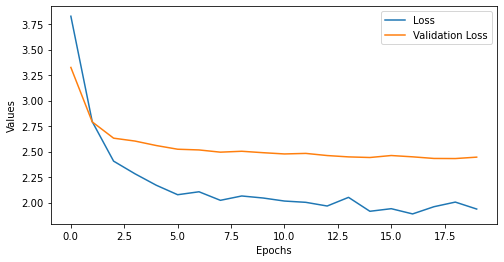

In [8]:
# regularized model
model = Sequential([
    Dense(64, input_dim = 12, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1)
])
model.summary()
plot_scores(fit_evaluate(model, data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________
training R2 score:  0.12278
testing R2 score: -0.095

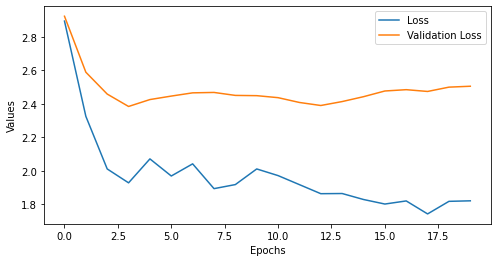

In [9]:
# simple RNN layer with regularization
model = Sequential([
    Input((12, 1)),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1)
])
model.summary()
plot_scores(fit_evaluate(model, data))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________
training R2 score:  0.01127
testing R2 score: -0.0

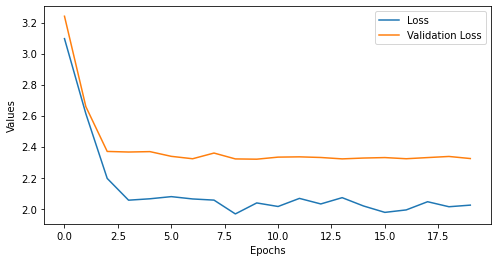

In [10]:
# long short term memory with regularization
model = Sequential([
    Input((12, 1)),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(1)
])
model.summary()
plot_scores(fit_evaluate(model, data))

# End of Deep Learning Regression